In [76]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017")
db = client.test

import pandas as pd
df = pd.DataFrame(list(db.lyrics.find({})))

In [4]:
df.describe()

,_id,artist,composer,lyricist,lyrics,title
count,28918,28918,25247,25231,28918,28918
unique,28918,200,4892,3273,22293,16592
top,5777e808340940e2084b83f9,鄧麗君,雷頌德,林夕,,Opening
freq,1,1121,647,2038,577,28


In [80]:
df[df.artist == u'陳奕迅']

,_id,artist,composer,lyricist,lyrics,title


In [79]:
df[df.lyrics.str.contains(u"愛情")]['_id'].count()

975

In [13]:
dcf = pd.DataFrame({'count': df.groupby('lyricist').size()})
dcf.sort_values(by='count', ascending=False).head(10)

,count
lyricist,
林夕,2038
黃偉文,864
林振強,677
陳少琪,508
鄭國江,504
周禮茂,449
潘源良,372
向雪懷,348
小美,334


In [134]:
# immediately drawing when it sees plot()
%matplotlib inline 

import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties 
plt.rcParams["font.family"]=['LiHei Pro'] # Or CHINESE will be corrupted!!!

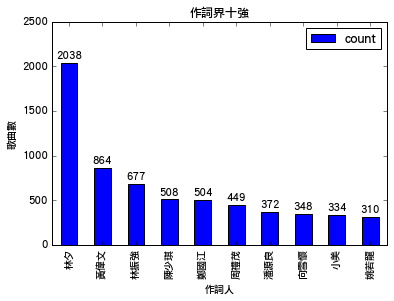

In [147]:
dcf_top_10 = dcf.sort_values(by='count', ascending=False).head(10)
ax = dcf_top_10.plot.bar(title=u"作詞界十強")
ax.set_xlabel(u'作詞人')
ax.set_ylabel(u'歌曲數')

for i, label in enumerate(list(dcf_top_10.index)):
    count = dcf_top_10.ix[label]['count']
    ax.annotate(str(count), (i, count + 50), horizontalalignment='center')
# plt.show()

In [44]:
# Jieba
import jieba
jieba.set_dictionary('dict.txt.big')

seg_list = jieba.cut("晚一點我們去吃大餐好嗎？")
print(", ".join(seg_list))

Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
DEBUG:jieba:Building prefix dict from /Users/Kent/src/Chinese_lyrics_analysis/dict.txt.big ...
Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
DEBUG:jieba:Loading model from cache /var/folders/qh/ym0qcw3d6w3_1hnkqf7xzxt40000gn/T/jieba.uaba23d6c739911e208dcbd05db062e96.cache
Loading model cost 1.111 seconds.
DEBUG:jieba:Loading model cost 1.111 seconds.
Prefix dict has been built succesfully.
DEBUG:jieba:Prefix dict has been built succesfully.


晚一點, George, 我們, 去, 吃, 大餐, 好, 嗎, ？


In [122]:
from wordcloud import WordCloud

def filter_rule_1(input):
    return True if len(input.strip()) > 1 else False

def filter_rule_2(input):
    return False if input.encode('utf-8').isdigit() or input.encode('utf-8').isalpha() else True

def draw_word_cloud(artist):
    cursor = db.lyrics.find({'artist': artist})

    if cursor.count() is 0:
        return

    check_duplicated_set = []
    whole_lyrics = ""
    for document in cursor:
        signature = [document['title'], document['composer'], document['lyricist']]
        if signature in check_duplicated_set:
            continue
        else:
            check_duplicated_set.append(signature)
            whole_lyrics += document['lyrics']
   
    token_list = [token for token in jieba.cut(whole_lyrics)]

    token_list = filter(filter_rule_1, token_list)
    token_list = filter(filter_rule_2, token_list)
    
    unique_token = float(len(set(token_list)))
    all_token = float(len((token_list)))
    print("richness: %f" % (unique_token / all_token))
    
    from collections import Counter
    counter = Counter(token_list)

    for t in counter.most_common(20):
        print("%s: %s" % (t[0], t[1]))
    
    wordcloud = WordCloud(
        font_path="/Library/Fonts/儷黑 Pro.ttf", background_color="black"
    ).fit_words(counter.most_common(100))

    plt.imshow(wordcloud)
    plt.axis("off")
#     plt.show()

richness: 0.216102
我們: 209
什麼: 203
沒有: 183
怎麼: 155
不要: 138
知道: 137
不是: 120
這樣: 113
不能: 111
自己: 106
離開: 102
回憶: 96
一直: 92
真的: 89
不會: 89
如果: 87
一起: 85
微笑: 84
一個: 84
開始: 79


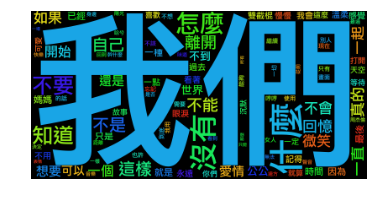

In [124]:
draw_word_cloud('周杰倫')